<a href="https://colab.research.google.com/github/classical16/gomycode/blob/main/data_visualization_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset into a data frame using Python.
Clean the data as needed.
Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
Select the best chart to show the Average temperature per country.
Make your own questions about the dataset and try to answer them using the appropriate visuals.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/Africa_climate_change (1).csv')


In [3]:
df

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon
...,...,...,...,...,...,...
464810,20230823 000000,NaN,85.0,89.0,NaN,Senegal
464811,20230823 000000,NaN,80.0,90.0,72.0,Egypt
464812,20230823 000000,NaN,87.0,NaN,73.0,Egypt
464813,20230823 000000,0.0,82.0,94.0,NaN,Senegal


In [4]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [5]:
missing_values = df.isnull()
print(missing_values.sum())

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64


In [6]:
df['TMAX'].fillna(2 * df['TAVG'] - df['TMIN'], inplace=True)

In [7]:
df['TMIN'].fillna(2 * df['TAVG'] - df['TMAX'], inplace=True)

In [8]:
df['TAVG'].fillna((df['TMAX'] + df['TMIN']) / 2, inplace=True)

In [9]:
missing_values = df.isnull()
print(missing_values.sum())

DATE            0
PRCP       287240
TAVG         2223
TMAX        45128
TMIN        45128
COUNTRY         0
dtype: int64


In [10]:
df.dropna(inplace=True)

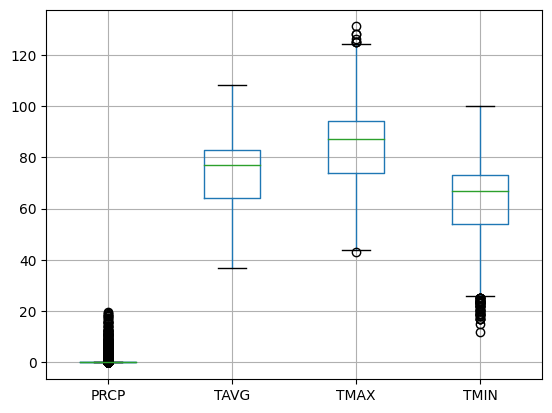

In [11]:
df.boxplot()
plt.show()

In [12]:
summary_stats = df.describe()
print(summary_stats)

                PRCP           TAVG           TMAX           TMIN
count  165067.000000  165067.000000  165067.000000  165067.000000
mean        0.121433      73.871858      84.483701      63.506776
std         0.489096      12.252141      13.435773      12.330327
min         0.000000      37.000000      43.000000      12.000000
25%         0.000000      64.000000      74.000000      54.000000
50%         0.000000      77.000000      87.000000      67.000000
75%         0.000000      83.000000      94.000000      73.000000
max        19.690000     108.000000     131.000000     100.000000


In [13]:
# prompt: Using dataframe df: drop outliers

df[df.isin(df.quantile([0.05, 0.95], numeric_only=True))]


,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
2,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
464801,NaN,NaN,NaN,NaN,NaN,NaN
464803,NaN,NaN,NaN,NaN,NaN,NaN
464804,NaN,NaN,NaN,NaN,NaN,NaN
464809,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
 # IDENTIFY OUTLIERS BASED ON A SPECIFIC COLUMN
column_name = 'TMAX'
Q1 = df['TMAX'].quantile(0.25)
Q3 = df['TMAX'].quantile(0.75)
IGR =Q3 - Q1

In [15]:
# DEFINE THE LOWER AND UPPER BOUNDS FOR OUTLIERS
lower_bound = Q1 - 1.5 * IGR
upper_bound = Q3 + 1.5 * IGR

In [16]:
column_name = 'TMIN'
Q1 = df['TMIN'].quantile(0.25)
Q3 = df['TMIN'].quantile(0.75)
IGR =Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IGR
upper_bound = Q3 + 1.5 * IGR

In [18]:
column_name = 'TAVG'
Q1 = df['TAVG'].quantile(0.25)
Q3 = df['TAVG'].quantile(0.75)
IGR =Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IGR
upper_bound = Q3 + 1.5 * IGR

In [20]:
# FILTER DATAFRAMES TO ECLUDE ROWS WITH OUTLIERS
df_no_outliers = df[((df['TMAX'] >= lower_bound) & (df['TMAX'] <= upper_bound)) & ((df['TMIN'] >= lower_bound) & (df['TMIN'] <= upper_bound))& (df['TAVG'] >= lower_bound) & (df['TAVG'] <= upper_bound)]
print(df_no_outliers)

                   DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
2       19800101 000000  0.00  72.0  86.0  59.0  Cameroon
6       19800101 000000  0.00  76.0  97.0  59.0   Senegal
7       19800101 000000  0.00  74.0  95.0  59.0   Senegal
8       19800101 000000  0.00  78.0  93.0  63.0   Senegal
9       19800101 000000  0.00  76.0  91.0  59.0   Senegal
...                 ...   ...   ...   ...   ...       ...
464801  20230823 000000  0.31  85.0  89.0  81.0   Senegal
464803  20230823 000000  1.22  83.0  90.0  76.0   Senegal
464804  20230823 000000  0.13  84.0  98.0  70.0   Tunisia
464809  20230823 000000  0.00  85.0  96.0  77.0   Tunisia
464813  20230823 000000  0.00  82.0  94.0  70.0   Senegal

[162123 rows x 6 columns]


In [21]:
df.info

<bound method DataFrame.info of                    DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
2       19800101 000000  0.00  72.0  86.0  59.0  Cameroon
6       19800101 000000  0.00  76.0  97.0  59.0   Senegal
7       19800101 000000  0.00  74.0  95.0  59.0   Senegal
8       19800101 000000  0.00  78.0  93.0  63.0   Senegal
9       19800101 000000  0.00  76.0  91.0  59.0   Senegal
...                 ...   ...   ...   ...   ...       ...
464801  20230823 000000  0.31  85.0  89.0  81.0   Senegal
464803  20230823 000000  1.22  83.0  90.0  76.0   Senegal
464804  20230823 000000  0.13  84.0  98.0  70.0   Tunisia
464809  20230823 000000  0.00  85.0  96.0  77.0   Tunisia
464813  20230823 000000  0.00  82.0  94.0  70.0   Senegal

[165067 rows x 6 columns]>

In [22]:
# convert Date column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

[]

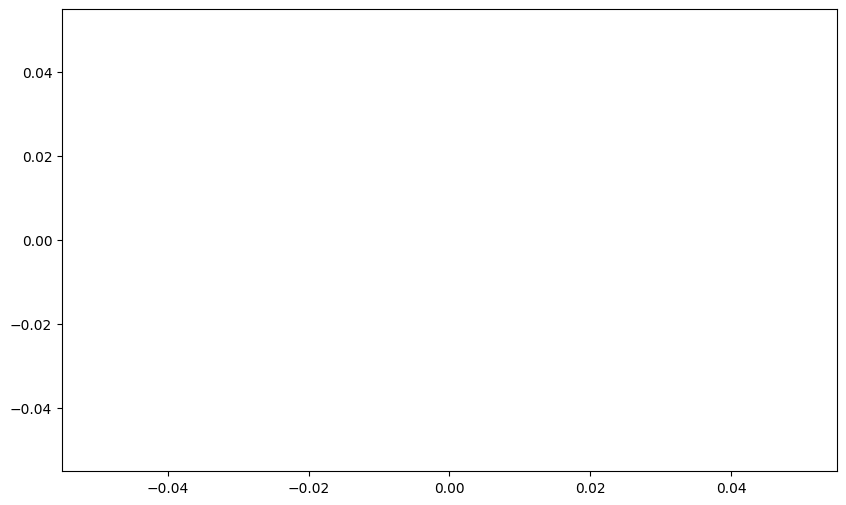

In [23]:
  # plot the line chart
plt.figure(figsize=(10, 6))
plt.plot()

In [24]:
average_TAVG = df['TAVG'].mean()
df

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
2,1980-01-01,0.00,72.0,86.0,59.0,Cameroon
6,1980-01-01,0.00,76.0,97.0,59.0,Senegal
7,1980-01-01,0.00,74.0,95.0,59.0,Senegal
8,1980-01-01,0.00,78.0,93.0,63.0,Senegal
9,1980-01-01,0.00,76.0,91.0,59.0,Senegal
...,...,...,...,...,...,...
464801,2023-08-23,0.31,85.0,89.0,81.0,Senegal
464803,2023-08-23,1.22,83.0,90.0,76.0,Senegal
464804,2023-08-23,0.13,84.0,98.0,70.0,Tunisia
464809,2023-08-23,0.00,85.0,96.0,77.0,Tunisia


In [25]:
new_df = df[(df['COUNTRY'] == 'Cameroon') | (df['COUNTRY'] == 'Tunisia')]
new_df

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
2,1980-01-01,0.00,72.0,86.0,59.0,Cameroon
22,1980-01-01,0.00,84.0,91.0,77.0,Cameroon
31,1980-01-02,0.00,75.0,91.0,61.0,Cameroon
41,1980-01-02,0.00,81.0,90.0,75.0,Cameroon
43,1980-01-02,0.00,76.0,95.0,59.0,Cameroon
...,...,...,...,...,...,...
464791,2023-08-23,0.00,80.0,93.0,67.0,Cameroon
464794,2023-08-23,0.03,71.0,84.0,58.0,Cameroon
464799,2023-08-23,0.00,90.0,102.0,80.0,Tunisia
464804,2023-08-23,0.13,84.0,98.0,70.0,Tunisia


In [26]:
new_df1 = new_df.groupby(['COUNTRY', 'DATE'])['TAVG'].mean()
new_df1

COUNTRY   DATE      
Cameroon  1980-01-01    78.000000
          1980-01-02    77.333333
          1980-01-03    80.000000
          1980-01-04    75.333333
          1980-01-05    74.333333
                          ...    
Tunisia   2023-08-19    88.250000
          2023-08-20    86.500000
          2023-08-21    84.750000
          2023-08-22    85.000000
          2023-08-23    86.500000
Name: TAVG, Length: 22252, dtype: float64

In [27]:
new_df2 = new_df1.reset_index()

In [28]:
# plot a line chart
fig = px.line(new_df2, x="DATE", y="TAVG", color="COUNTRY", title='average Temperature Flunctuation', labels={'x': 'DATE', "y": 'TAVG'})
fig.show()

In [35]:
subset_df = df[(df['COUNTRY'] == 'Senegal')]
subset_df1 = subset_df[(subset_df['DATE'] >= '1980') & (subset_df['DATE'] <='2005')]
subset_df1

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
6,1980-01-01,0.0,76.0,97.0,59.0,Senegal
7,1980-01-01,0.0,74.0,95.0,59.0,Senegal
8,1980-01-01,0.0,78.0,93.0,63.0,Senegal
9,1980-01-01,0.0,76.0,91.0,59.0,Senegal
13,1980-01-01,0.0,74.0,81.0,66.0,Senegal
...,...,...,...,...,...,...
249411,2004-12-31,0.0,77.0,91.0,68.0,Senegal
249418,2004-12-31,0.0,78.0,102.0,65.0,Senegal
249419,2004-12-31,0.0,76.0,101.0,67.0,Senegal
249420,2004-12-31,0.0,75.0,85.0,65.0,Senegal


In [36]:
fig = px.line(subset_df, x="DATE", y="TAVG", color="COUNTRY", title='average Temperature Flunctuation', labels={'x': 'DATE', "y": 'TAVG'})
fig.show()

In [37]:
subset_df2 = subset_df[(subset_df['DATE'] >= '1980') & (subset_df['DATE'] <='2000')]
subset_df3 = subset_df[(subset_df['DATE'] >= '2000') & (subset_df['DATE'] <='2023')]

In [54]:
fig1 = px.histogram(subset_df2, x='TAVG', nbins=5,color = "COUNTRY", color_discrete_map={"Senegal": 'red'})
fig2 = px.histogram(subset_df3, x='TAVG', nbins=5,color = "COUNTRY",color_discrete_map={"Senegal": 'blue'})
fig = go.Figure(data = fig1.data + fig2.data)
fig.show()

In [62]:
new_df5 = df.groupby(['COUNTRY'])['TAVG'].mean()
new_df5

dtype('float64')

In [55]:
new_df6 = new_df5.reset_index()

In [63]:
new_df6.dtypes

COUNTRY     object
TAVG       float64
dtype: object

In [68]:
fig=px.bar(new_df6, x='COUNTRY', y='TAVG')
fig.show()